In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer

## Part 1

In [2]:
df = pd.read_csv("bright_automotive_company.csv")
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [28]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1548,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.000000,33300,27000,Hatchback
1549,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,20225.559322,32000,31000,Hatchback
1550,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.000000,32900,30000,Hatchback
1551,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,20225.559322,32200,24000,Hatchback
1552,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.000000,31600,31000,Hatchback


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [4]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [5]:
df.shape

(1581, 14)

In [6]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

## Part 2 : EDA

In [7]:
missing_values = df.isnull()
missing_values

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1577,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1578,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1579,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [8]:
missing_values_sum = df.isnull().sum()
missing_values_sum

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [9]:
def impute_missing_values(df):
        for column in df.columns:
            if df[column].isnull().sum() > 0:
                if pd.api.types.is_numeric_dtype(df[column]):
                    column_skewness = skew(df[column].dropna())
                    strategy = 'median' if abs(column_skewness) > 0.5 else 'mean'
                else:
                    strategy = 'most_frequent'
                imputer = SimpleImputer(strategy=strategy)
                df[column] = imputer.fit_transform(df[[column]]).ravel()
        return df

In [10]:
df = impute_missing_values(df)

In [11]:
missing_values_sum = df.isnull().sum()
missing_values_sum

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [12]:
duplicate_value = df.duplicated()
duplicate_value

0       False
1       False
2       False
3       False
4       False
        ...  
1576    False
1577    False
1578    False
1579    False
1580    False
Length: 1581, dtype: bool

In [13]:
duplicate_value = df.duplicated().sum()
duplicate_value

0

In [14]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

In [15]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Column '{col}' contains outliers:")
        print(outliers.values)

Column 'Age' contains outliers:
[120]
Column 'Total_salary' contains outliers:
[170000 165800 158000 165700 162900 159000 169000 165600 161100 166900
 155200 170400 171000 154100 164700 161800 153500 169300 159100 162300
 161100 166500 156900 158900 157700 157900 158200]
Column 'Price' contains outliers:
[680000]


In [16]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    df = df.drop(outliers)
df = df.reset_index(drop=True)

In [17]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Column '{col}' contains outliers:")
        print(outliers.values)
    else:
        print("no outliers")     
     

no outliers
no outliers
no outliers
no outliers
no outliers


In [18]:
df['Gender'] = df['Gender'].replace('Femle', 'Female')

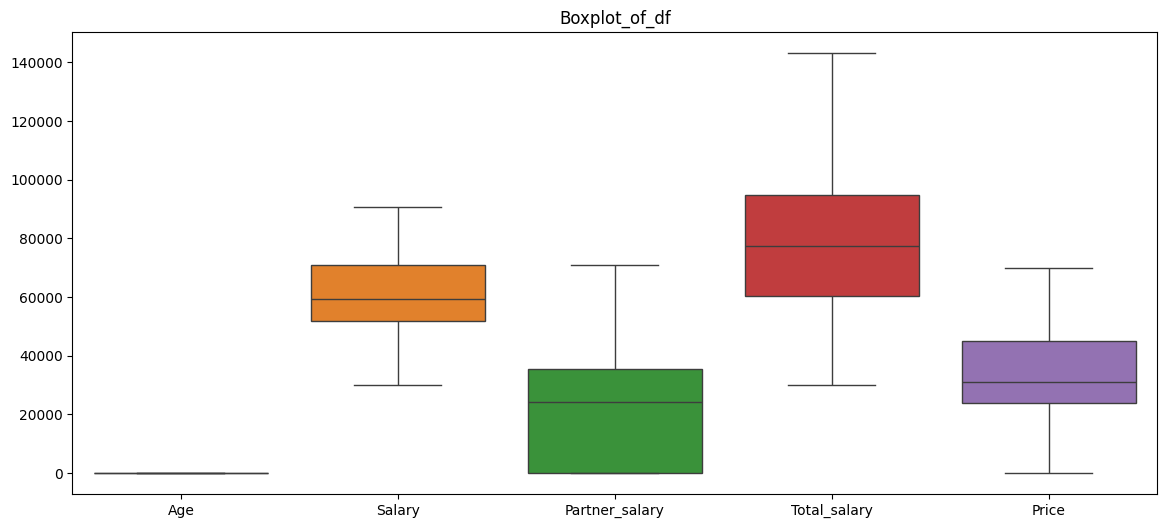

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.title("Boxplot_of_df")
plt.show() 

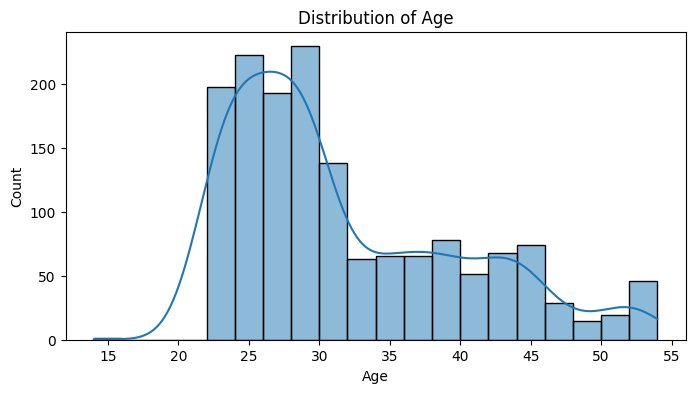

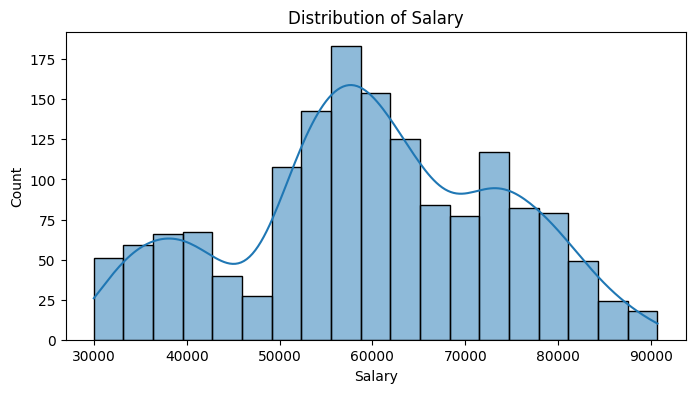

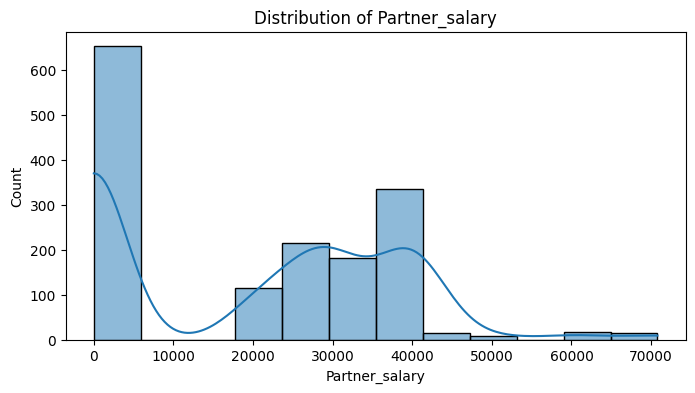

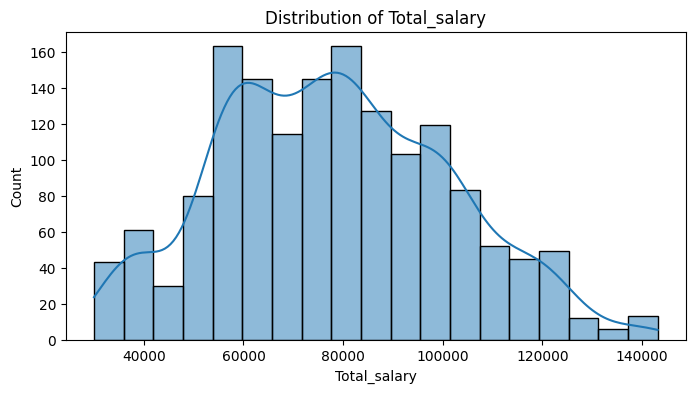

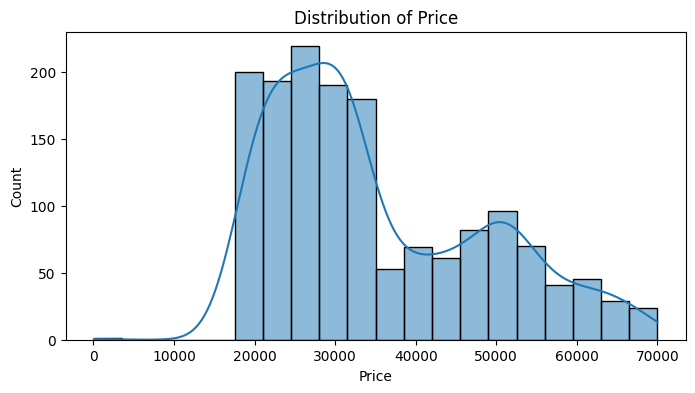

Value counts for Gender:
Gender
Male      1239
Female     314
Name: count, dtype: int64


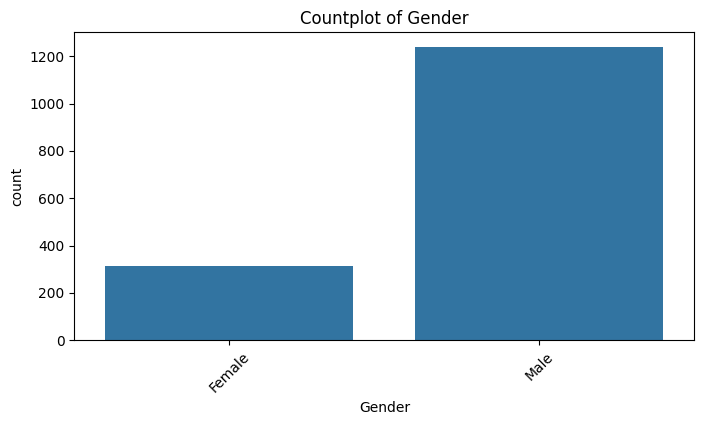

Value counts for Profession:
Profession
Salaried    876
Business    677
Name: count, dtype: int64


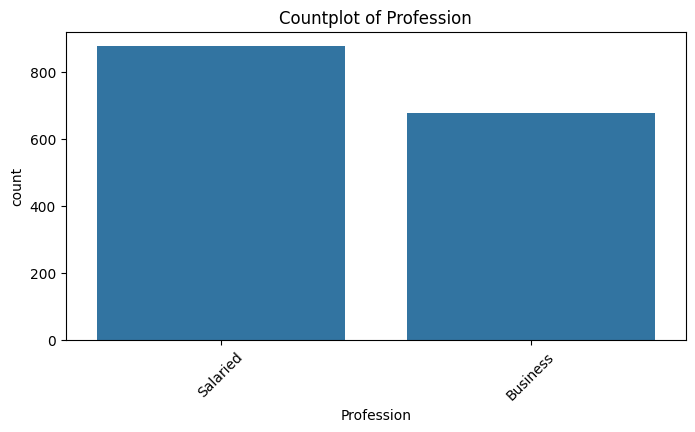

Value counts for Marital_status:
Marital_status
Married    1415
Single      138
Name: count, dtype: int64


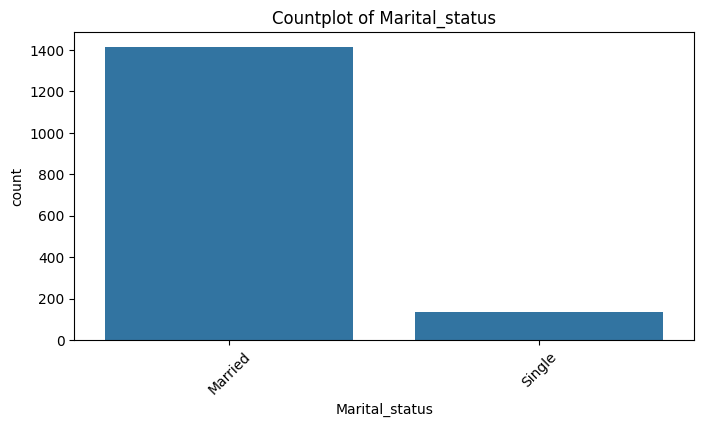

Value counts for Education:
Education
Post Graduate    963
Graduate         590
Name: count, dtype: int64


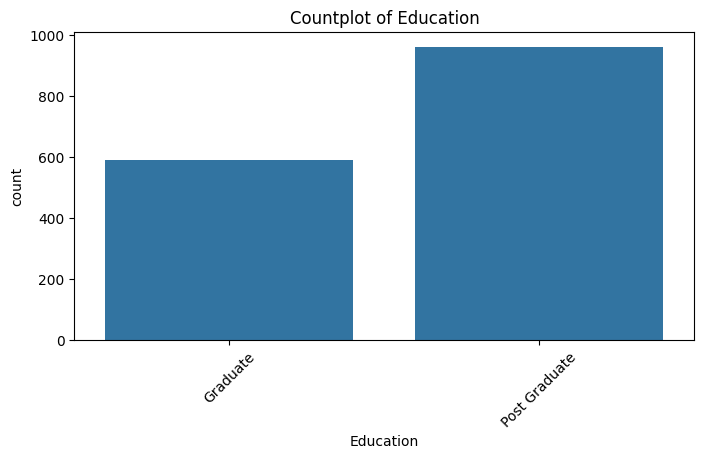

Value counts for No_of_Dependents:
No_of_Dependents
2    550
3    545
1    229
4    207
0     20
?      2
Name: count, dtype: int64


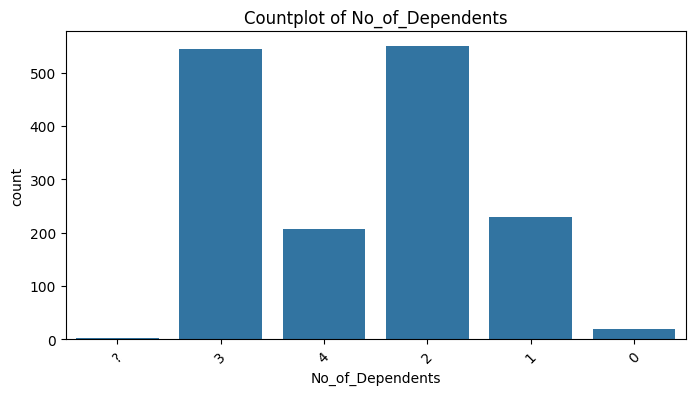

Value counts for Personal_loan:
Personal_loan
Yes    785
No     768
Name: count, dtype: int64


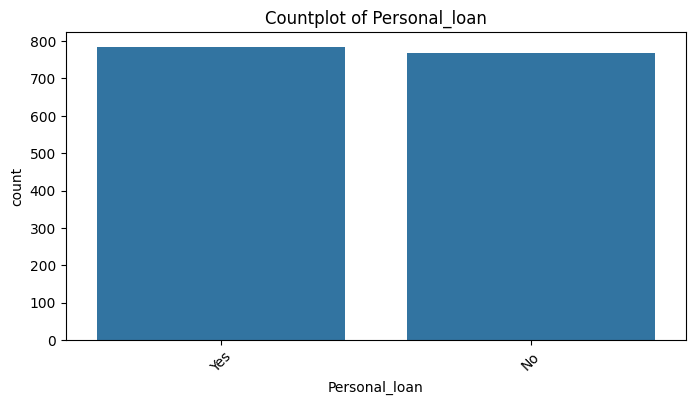

Value counts for House_loan:
House_loan
No     1026
Yes     527
Name: count, dtype: int64


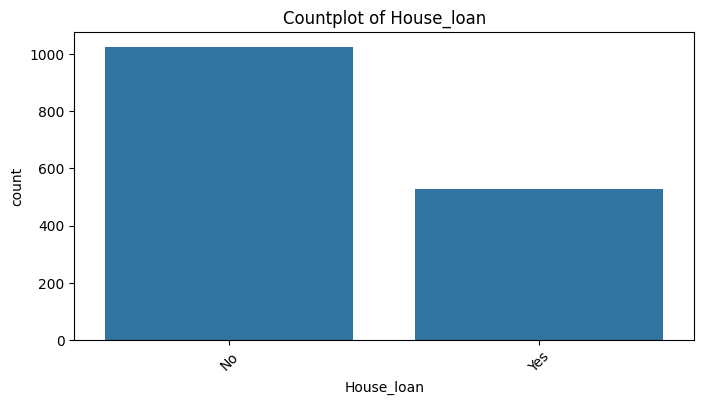

Value counts for Partner_working:
Partner_working
Yes    840
No     713
Name: count, dtype: int64


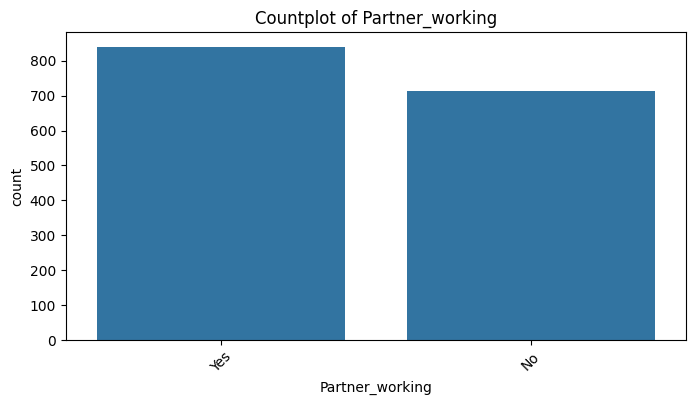

Value counts for Make:
Make
Sedan        702
Hatchback    582
SUV          267
?              2
Name: count, dtype: int64


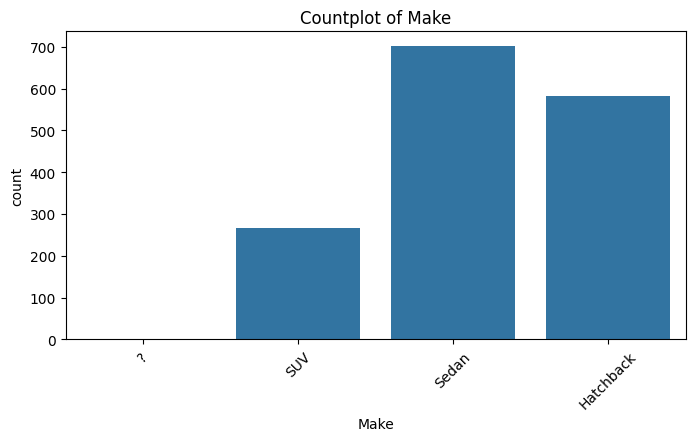

In [20]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                     Age    Salary  Partner_salary  Total_salary     Price
Age             1.000000  0.565334        0.041647      0.391190  0.777369
Salary          0.565334  1.000000       -0.017661      0.597494  0.347832
Partner_salary  0.041647 -0.017661        1.000000      0.757078  0.092708
Total_salary    0.391190  0.597494        0.757078      1.000000  0.293789
Price           0.777369  0.347832        0.092708      0.293789  1.000000


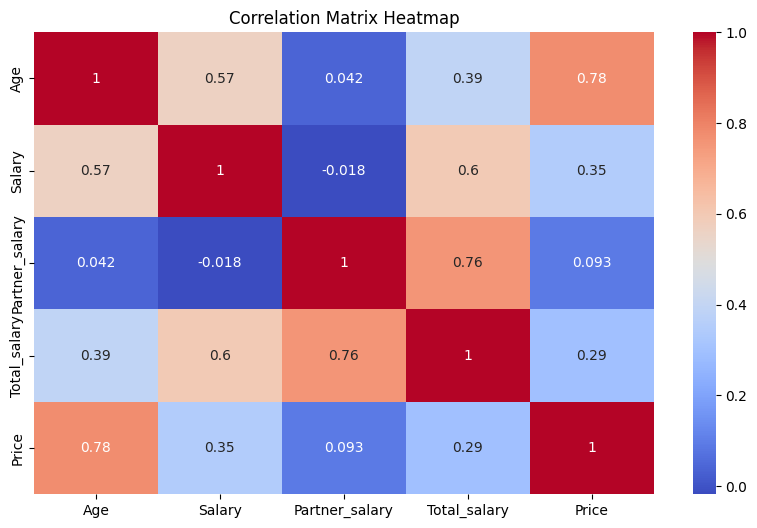

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


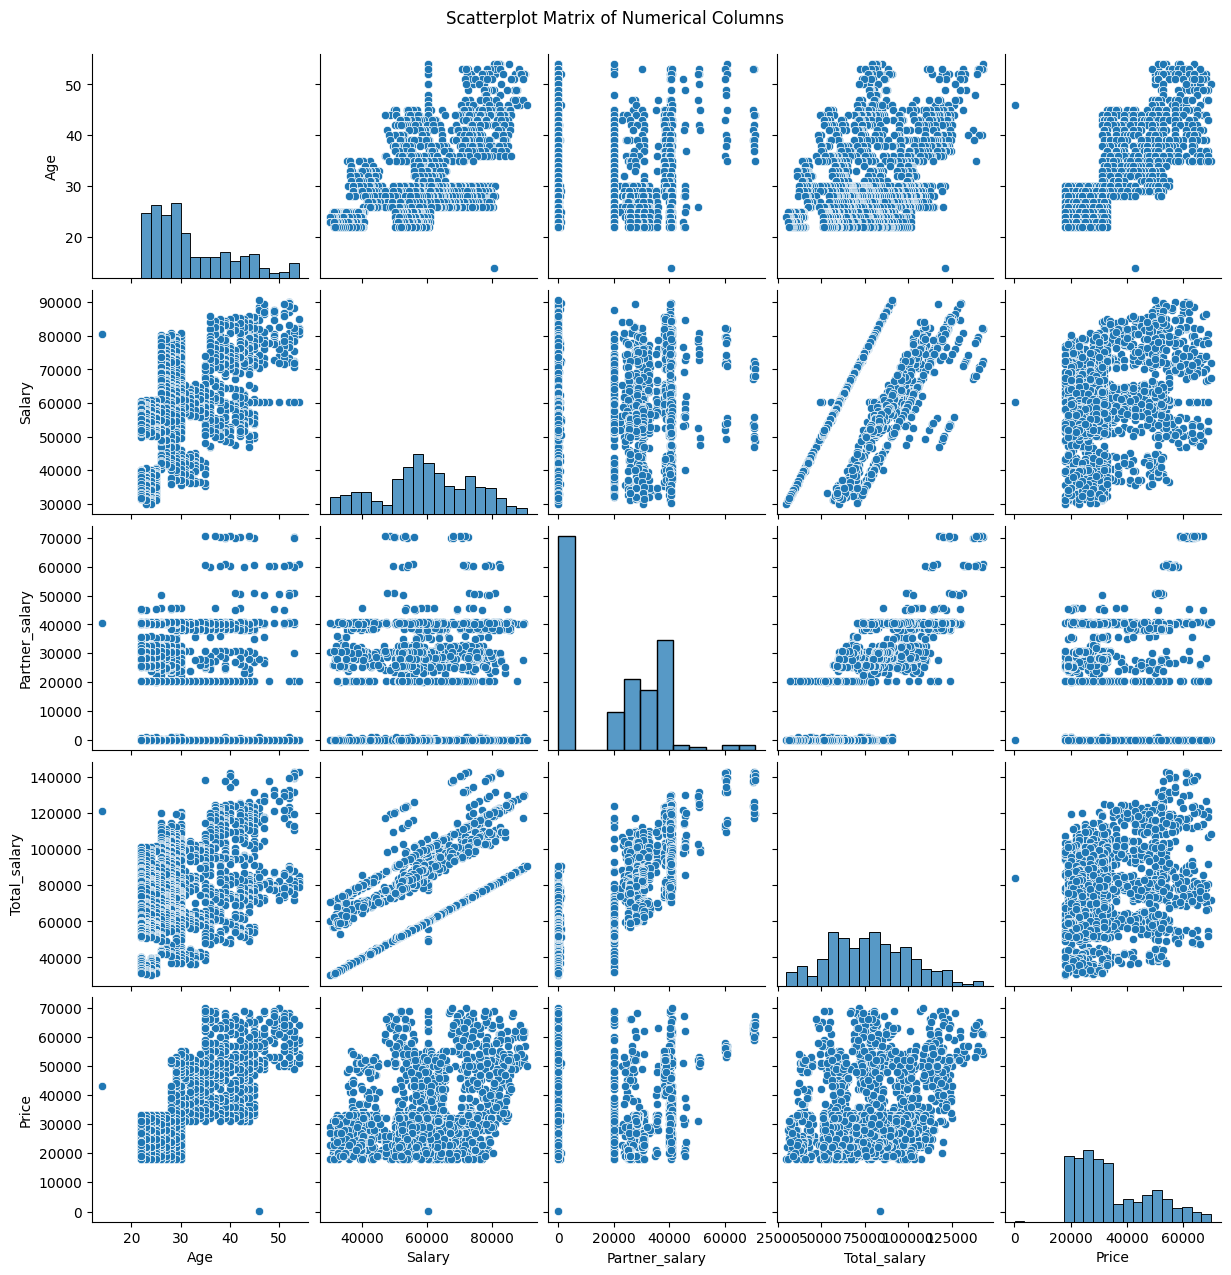

In [23]:
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) >= 2:
    sns.pairplot(df[num_cols])
    plt.suptitle("Scatterplot Matrix of Numerical Columns", y=1.02)
    plt.show()

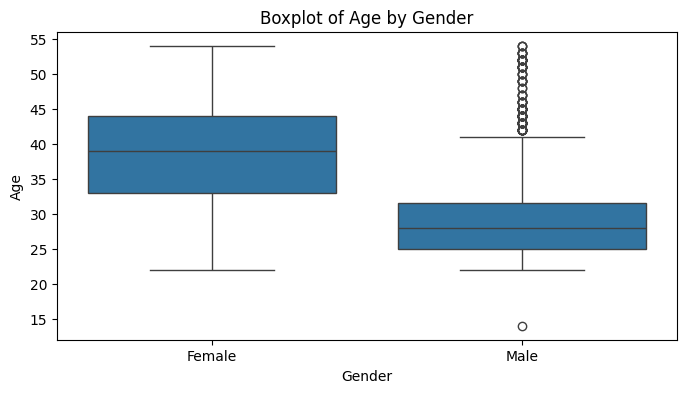

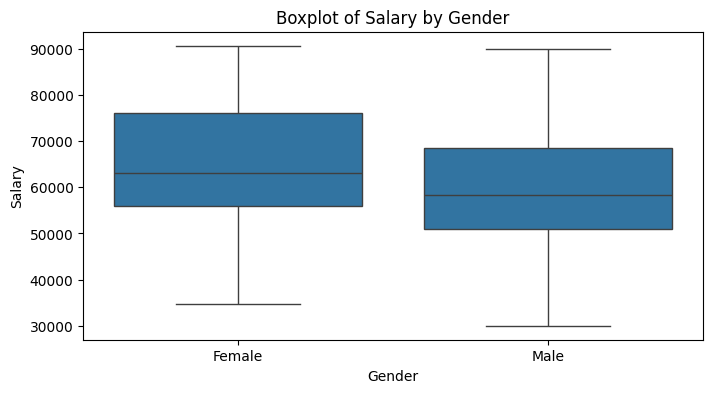

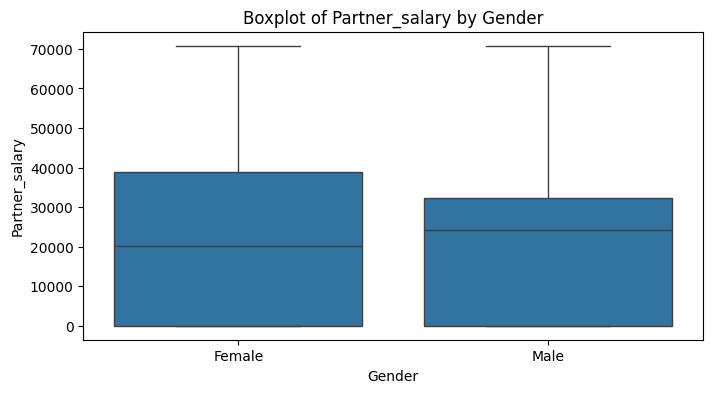

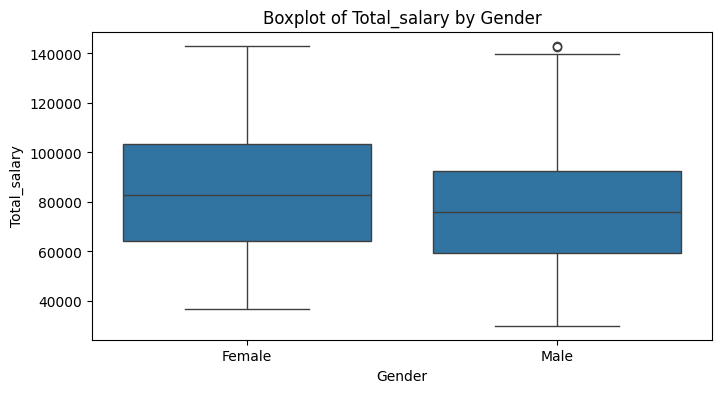

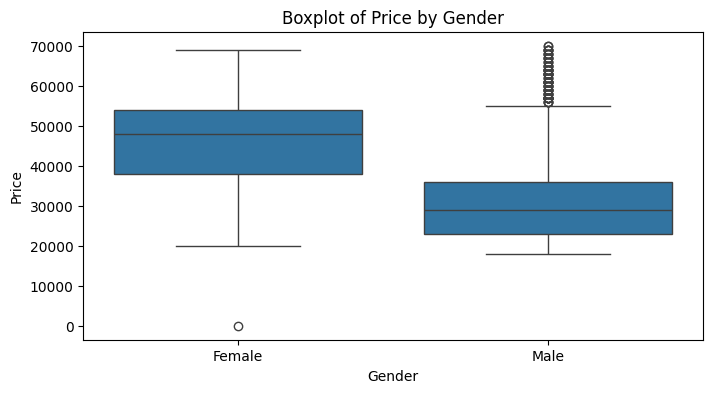

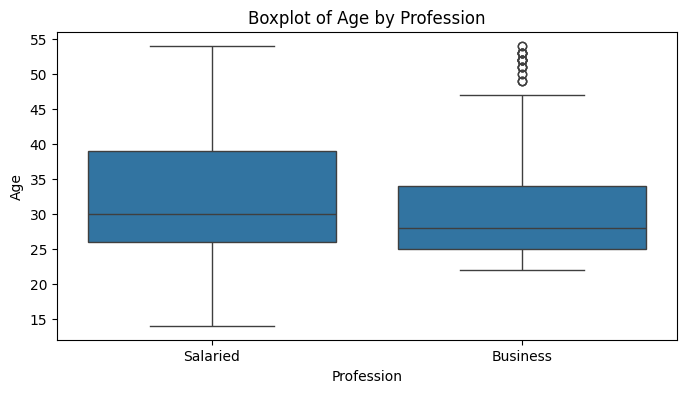

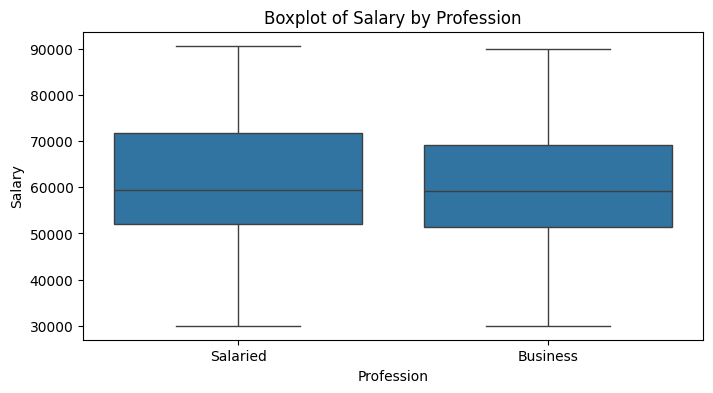

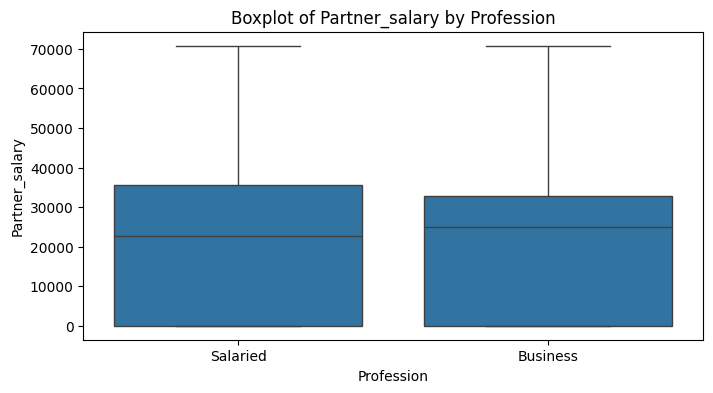

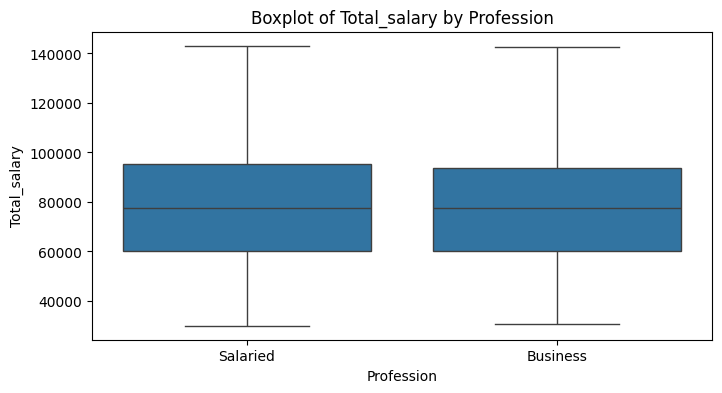

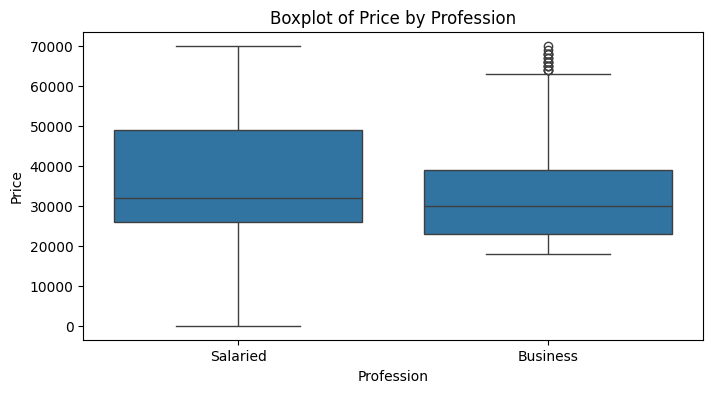

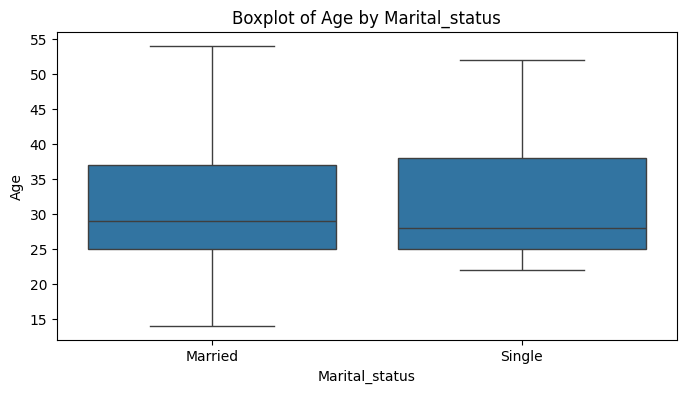

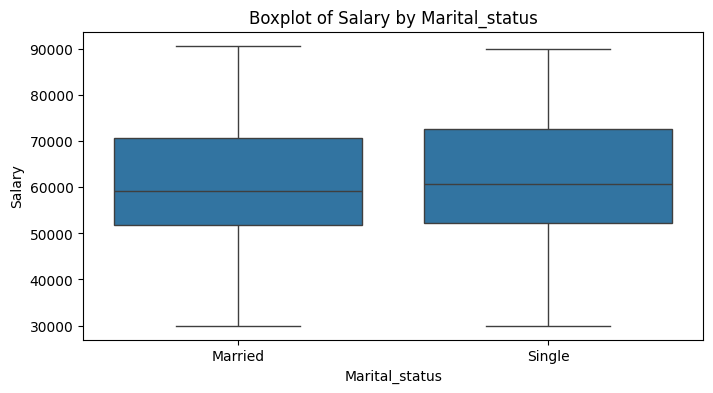

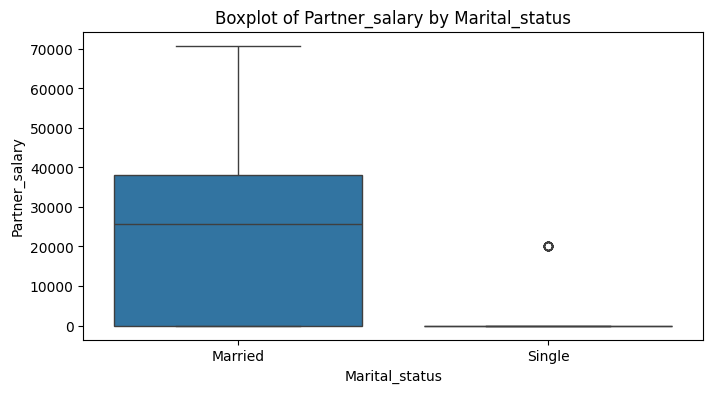

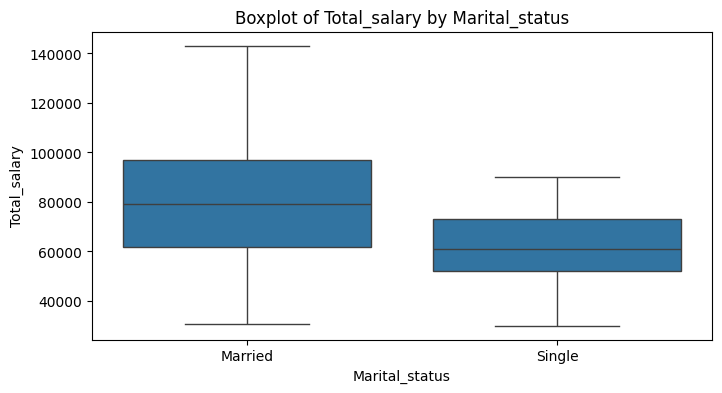

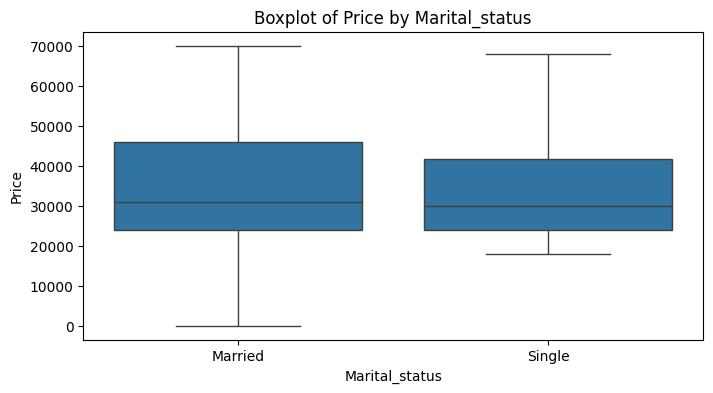

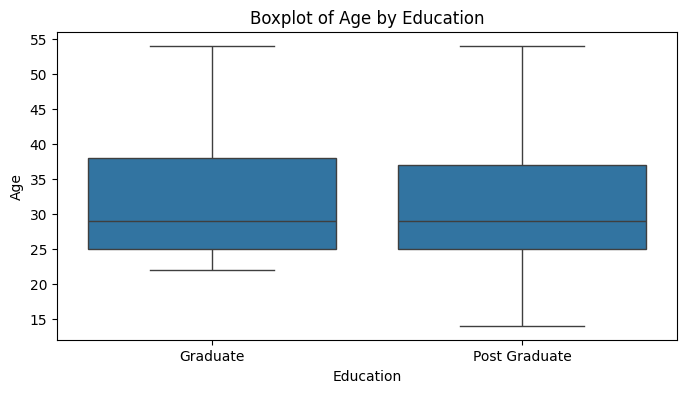

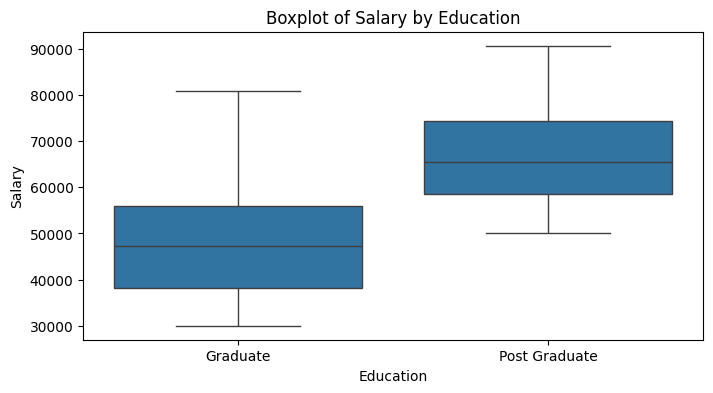

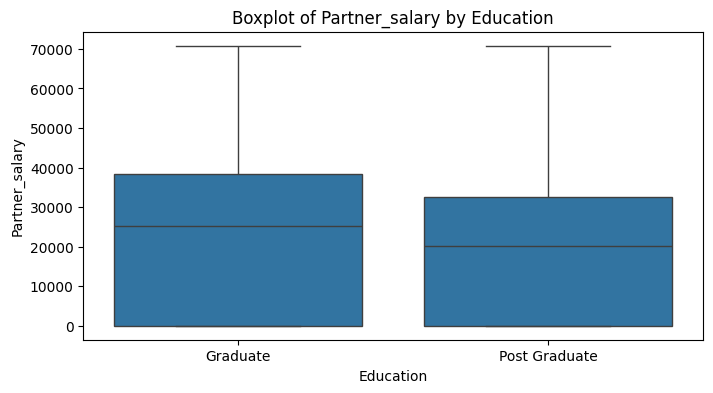

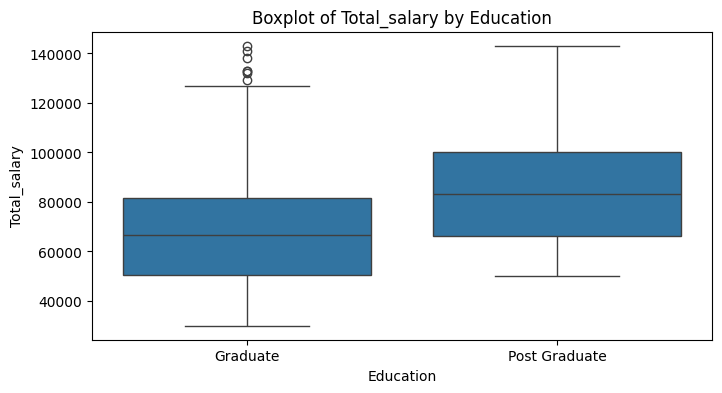

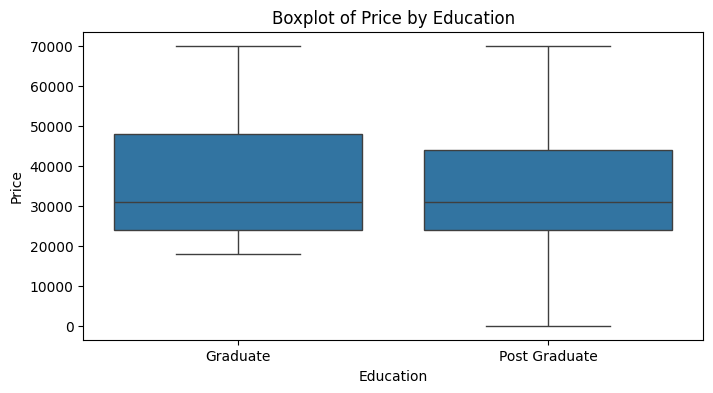

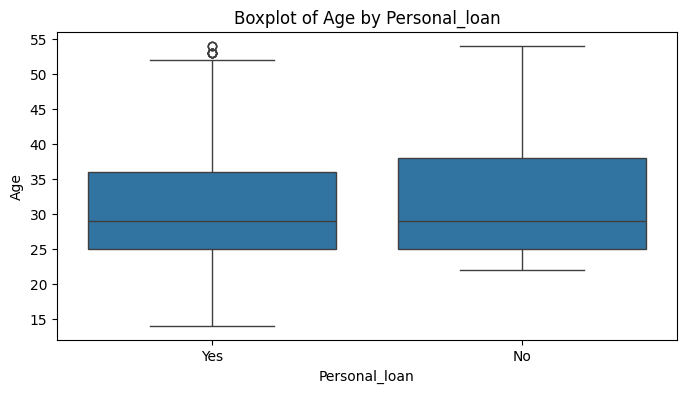

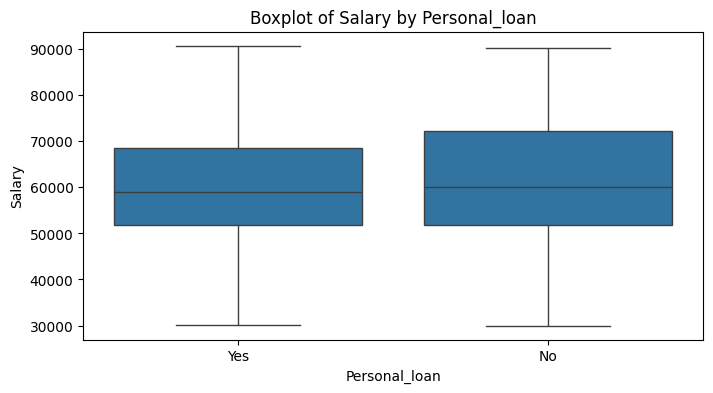

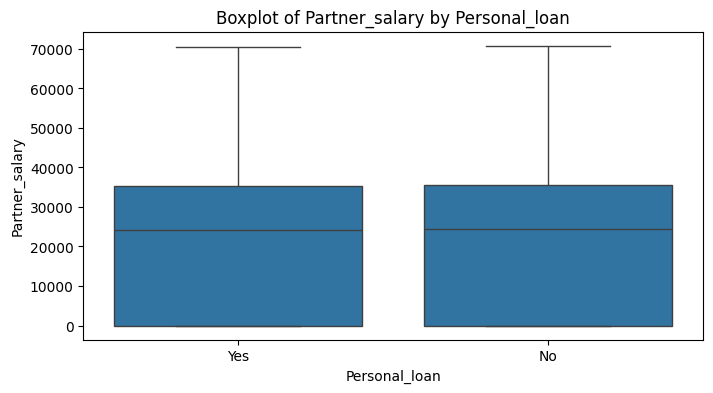

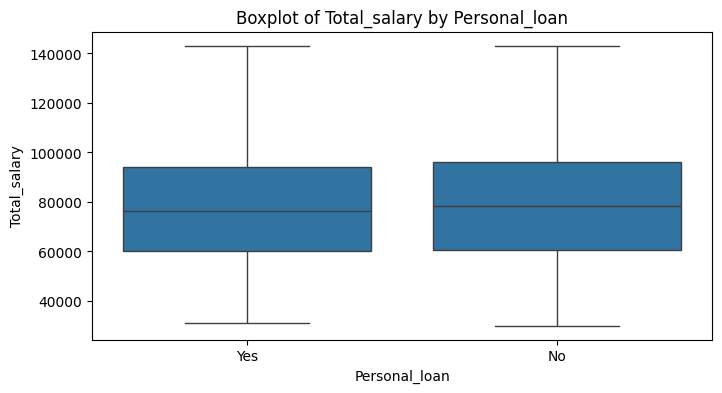

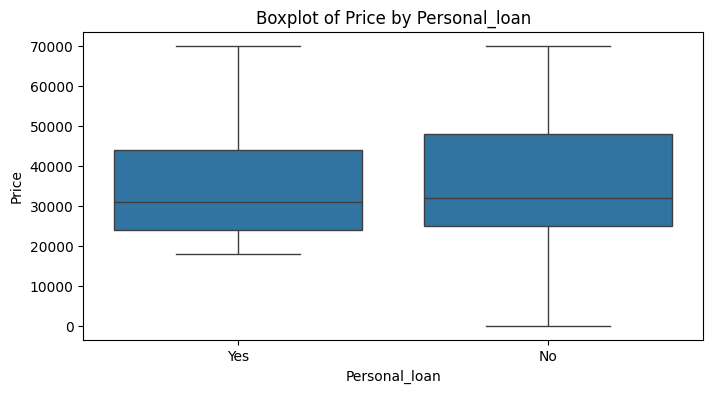

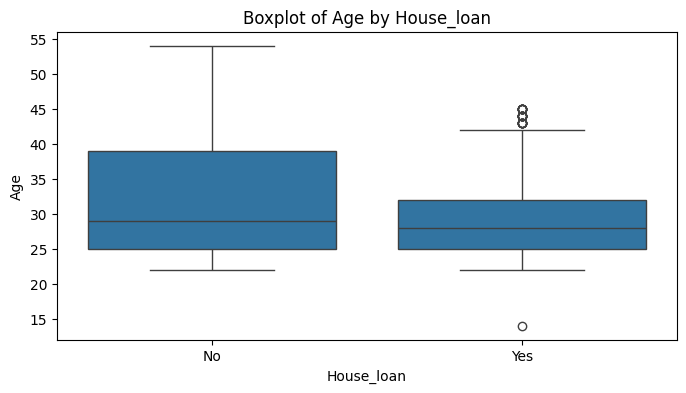

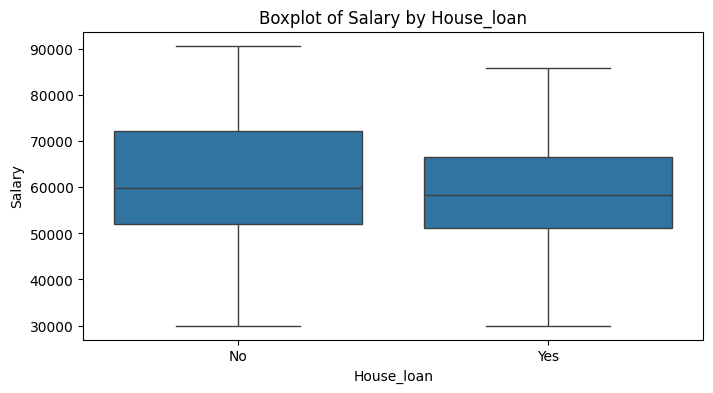

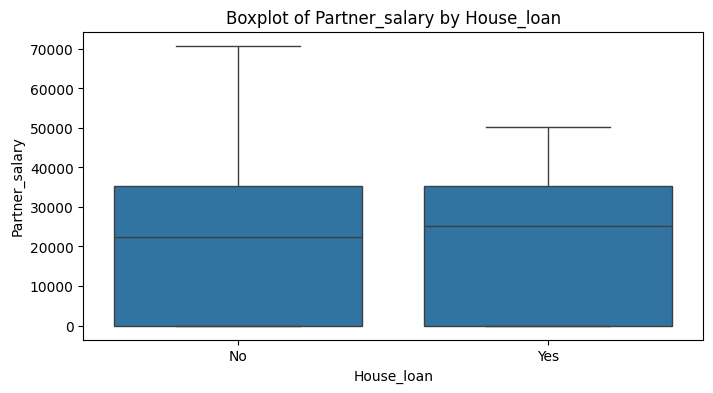

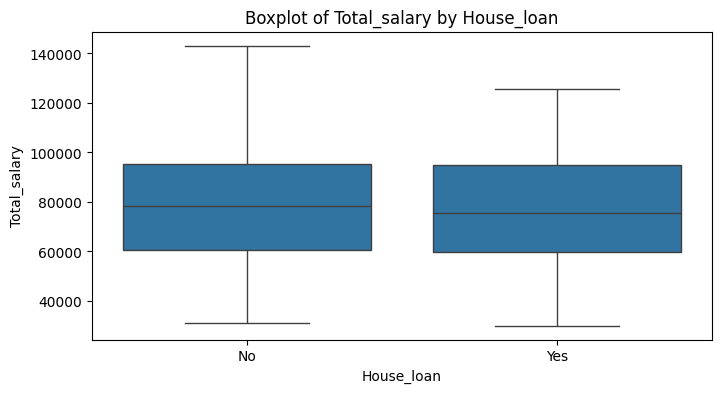

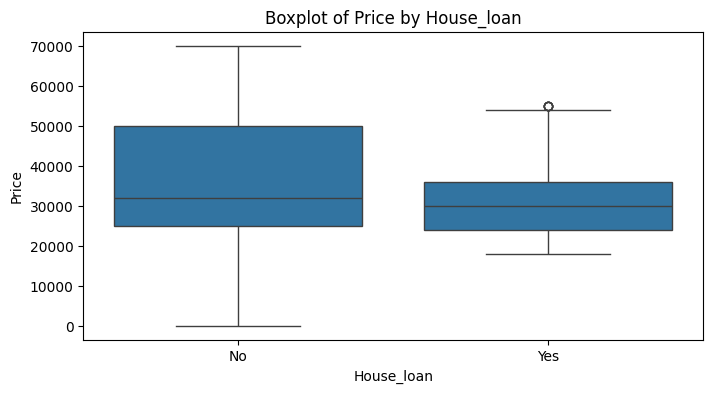

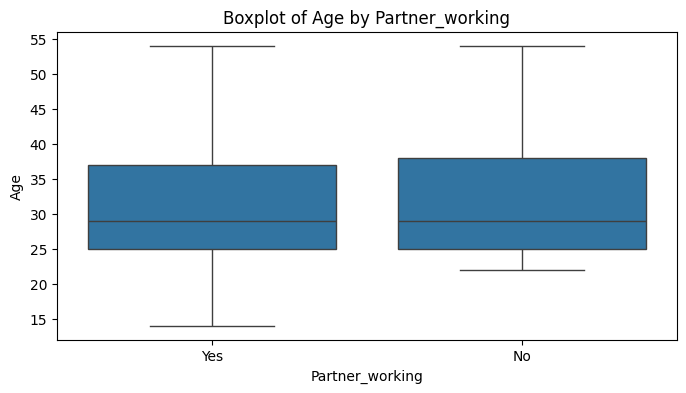

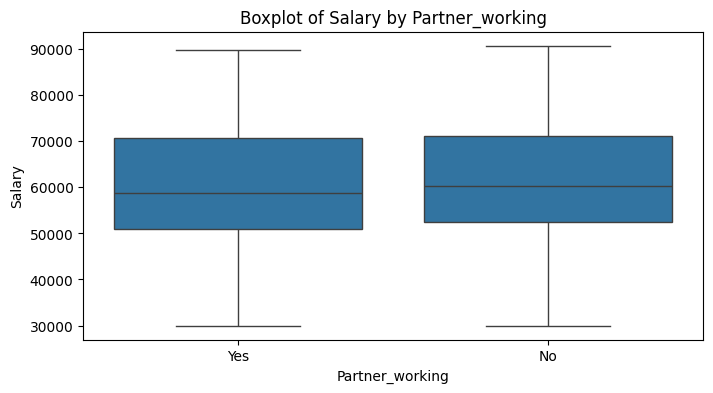

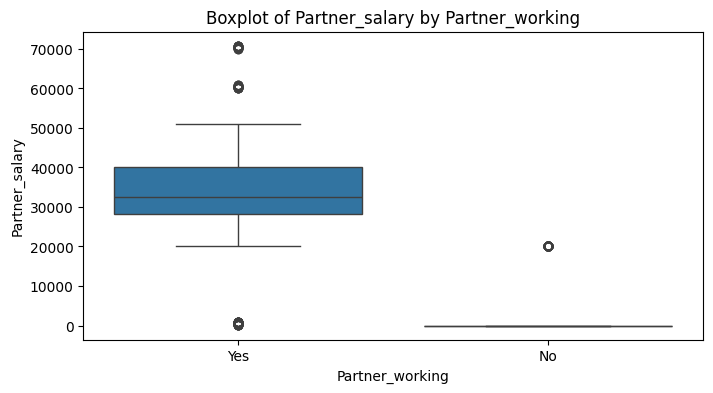

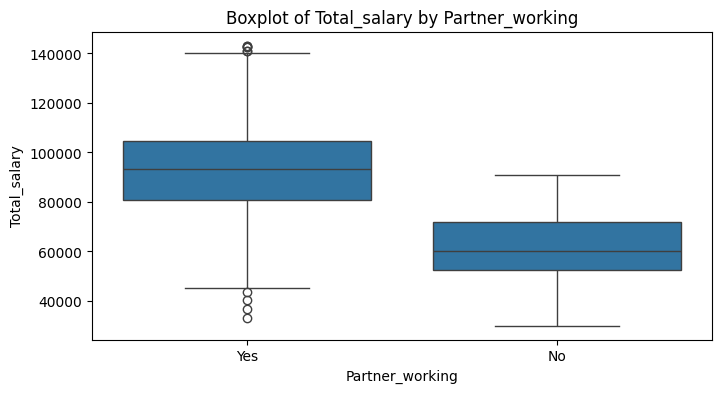

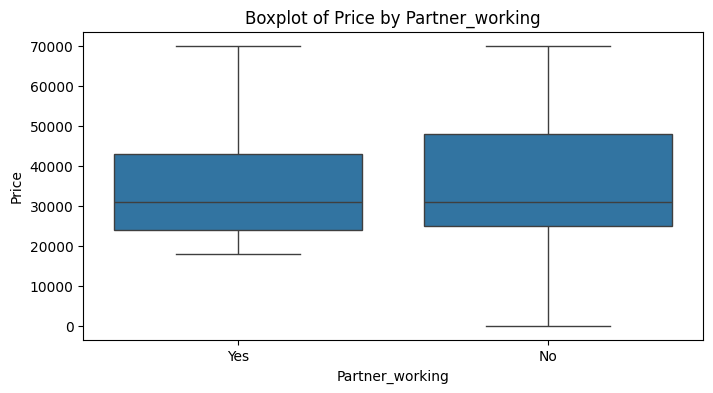

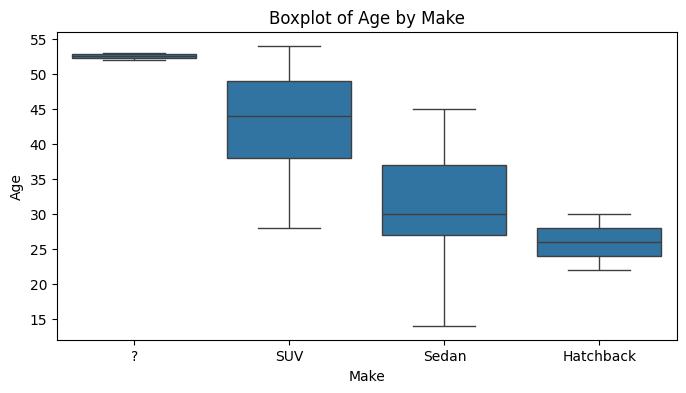

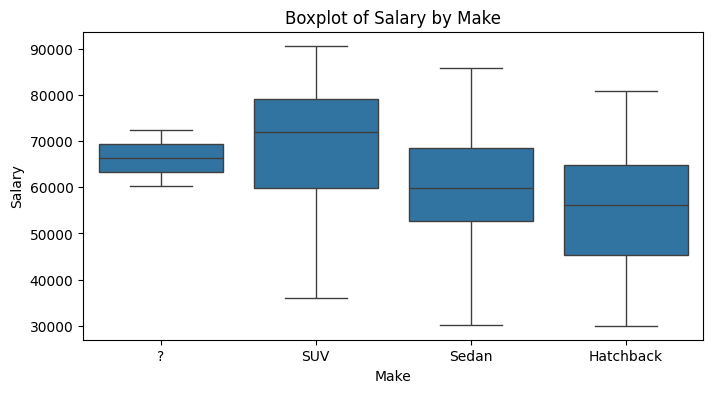

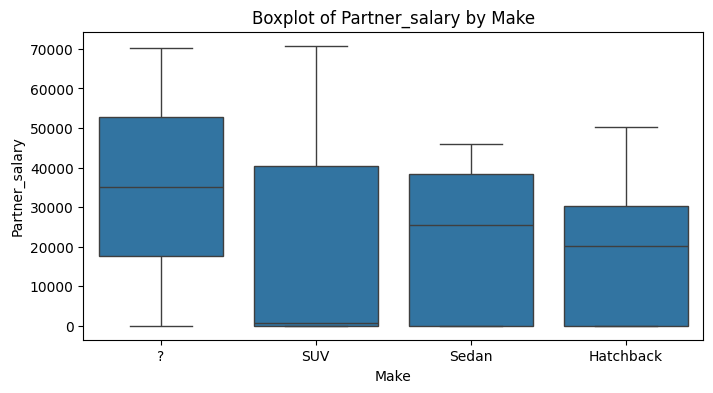

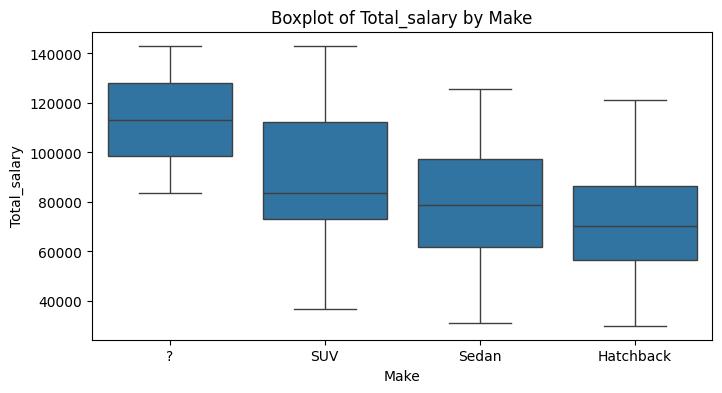

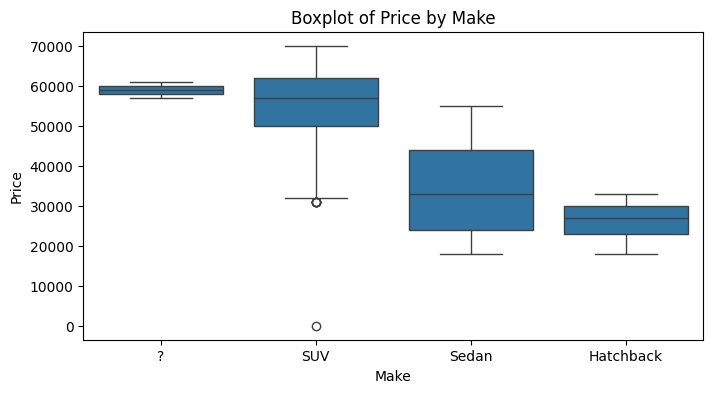

In [78]:
cat_cols = df.select_dtypes(include='object').columns
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'Boxplot of {num} by {cat}')
        plt.show()

## Descriptive Statistics:
What are the mean, median, and standard deviation of the ages of individuals in the dataset?


In [25]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()

print(f"Mean Age: {age_mean}")
print(f"Median Age: {age_median}")
print(f"Standard Deviation of Age: {age_std}")

Mean Age: 31.600772698003862
Median Age: 29.0
Standard Deviation of Age: 8.180095871975954


## Data Distribution:
What is the distribution of gender in the dataset? Represent it using a pie chart.


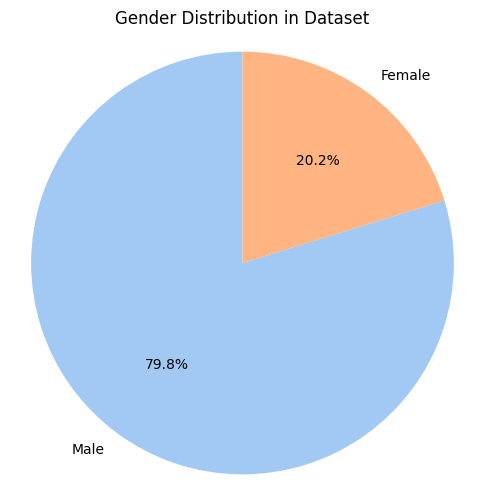

In [27]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution in Dataset')
plt.axis('equal')
plt.show()

## Correlation Analysis:
Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.


In [31]:
corr_coef = df['Age'].corr(df['Salary'])
print(f"Correlation coefficient between Age and Salary: {corr_coef:.3f}")
if (corr_coef) > 0.7:
    interpretation = "strong"
elif (corr_coef) > 0.5:
    interpretation = "moderate"
elif (corr_coef) > 0:
    interpretation = "weak"
else:
    interpretation = "no"

print(f"There is a {interpretation} correlation between Age and Salary.")

Correlation coefficient between Age and Salary: 0.565
There is a moderate correlation between Age and Salary.


## Salary Analysis:
What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?


In [37]:
avg_salary = df.groupby('Education')['Salary'].mean()[['Graduate', 'Post Graduate']]
print("Average Salary by Education:")
print(avg_salary)

Average Salary by Education:
Education
Graduate         48103.741785
Post Graduate    66775.381329
Name: Salary, dtype: float64


## Loan Status:
What percentage of individuals have taken a personal loan? How does this compare between males and females?


Percentage of individuals who have taken a personal loan: 50.55%

Percentage of individuals who have taken a personal loan by gender:
Gender
Female    46.815287
Male      51.493140
Name: Yes, dtype: float64


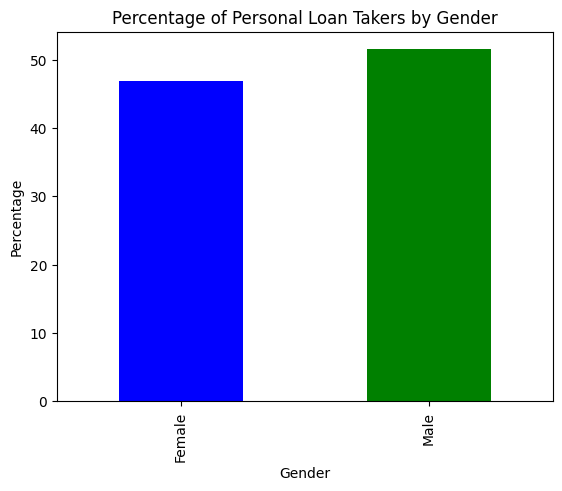

In [ ]:
personal_loan_counts = df['Personal_loan'].value_counts(normalize=True) * 100
percent_taken_loan = personal_loan_counts.get('Yes', 0)
print(f"Percentage of individuals who have taken a personal loan: {percent_taken_loan:.2f}%")

loan_by_gender = df.groupby('Gender')['Personal_loan'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nPercentage of individuals who have taken a personal loan by gender:")
print(loan_by_gender['Yes'])

loan_by_gender['Yes'].plot(kind='bar', color=['blue', 'green'])
plt.ylabel('Percentage')
plt.title('Percentage of Personal Loan Takers by Gender')
plt.show()

## Marital Status and Dependents:
What is the average number of dependents for married individuals versus single individuals?


In [54]:
avg_dependents = df.groupby('Marital_status')['No_of_Dependents'].mean()
print("Average : ")
print(avg_dependents)

Average : 
Marital_status
Married    2.526539
Single     1.608696
Name: No_of_Dependents, dtype: float64


## Partner Employment:
How does the employment status of a partner affect the total combined salary?


In [ ]:
avg_total_salary_by_partner = df.groupby('Partner_working')['Total_salary'].mean()
print("Average Total Combined Salary by Partner Employment Status:")
print(avg_total_salary_by_partner)


Average Total Combined Salary by Partner Employment Status:
Partner_working
No     60527.208976
Yes    93143.452381
Name: Total_salary, dtype: float64


## Salary Comparison:
Compare the average salary of individuals whose partners are working versus those whose partners are not working.


Average Salary by Partner Employment Status:
Partner_working
No     60271.528573
Yes    59181.309524
Name: Salary, dtype: float64


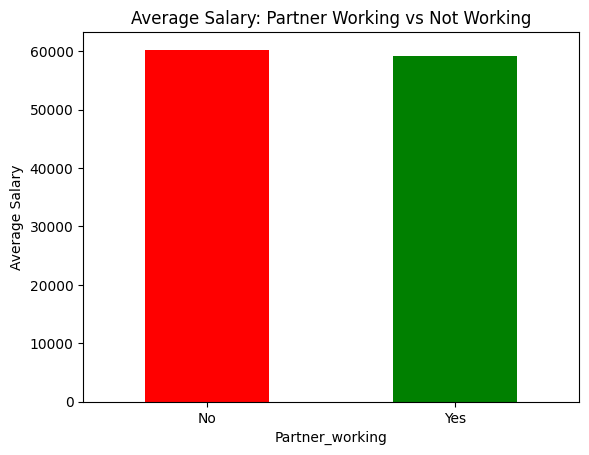

In [ ]:
avg_salary_by_partner = df.groupby('Partner_working')['Salary'].mean()
print("Average Salary by Partner Employment Status:")
print(avg_salary_by_partner)

avg_salary_by_partner.plot(kind='bar', color=['red', 'green'])
plt.ylabel('Average Salary')
plt.title('Average Salary: Partner Working vs Not Working')
plt.xticks(rotation =0)
plt.show()

## House Loan Analysis:
What is the proportion of individuals with house loans based on their profession?


Proportion of individuals with house loans by profession :
Profession
Business    33.825702
Salaried    34.018265
Name: Yes, dtype: float64


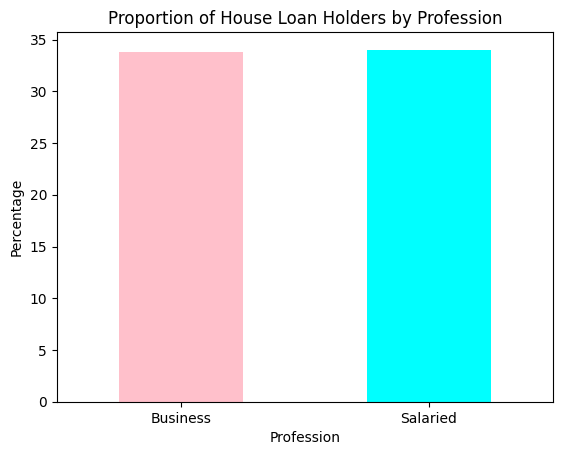

In [ ]:
house_loan_by_profession = df.groupby('Profession')['House_loan'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Proportion of individuals with house loans by profession :")
print(house_loan_by_profession['Yes'])

house_loan_by_profession['Yes'].plot(kind='bar', color=['pink','cyan'])
plt.ylabel('Percentage')
plt.title('Proportion of House Loan Holders by Profession')
plt.xticks(rotation=0)
plt.show()